In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv


In [2]:
data = pd.read_csv('/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### Check for Duplicates

In [4]:
data.duplicated().sum()

0

In [5]:
print("Max crop year : ",data['Crop_Year'].max())
print("Min crop year : ",data['Crop_Year'].min())
print("Max yield : ",data['Yield'].max())
print("Min yield : ",data['Yield'].min())

Max crop year :  2020
Min crop year :  1997
Max yield :  21105.0
Min yield :  0.0


Data Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

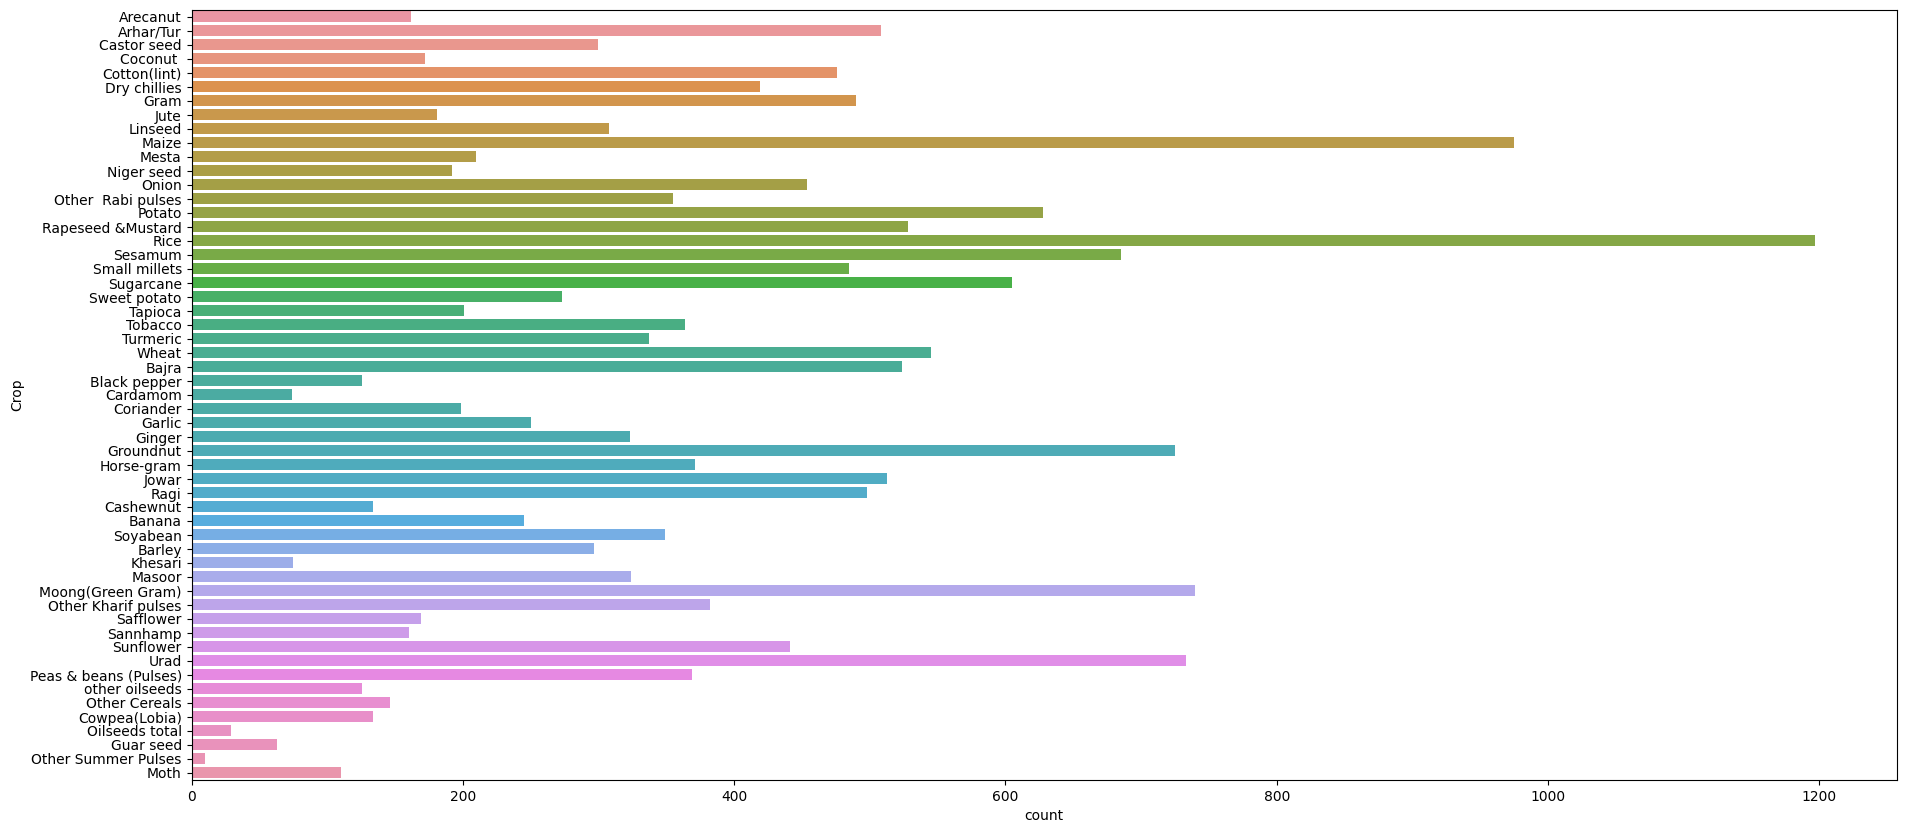

In [8]:
plt.figure(figsize=(22,10))
sns.countplot(y='Crop',data=data)
plt.show()

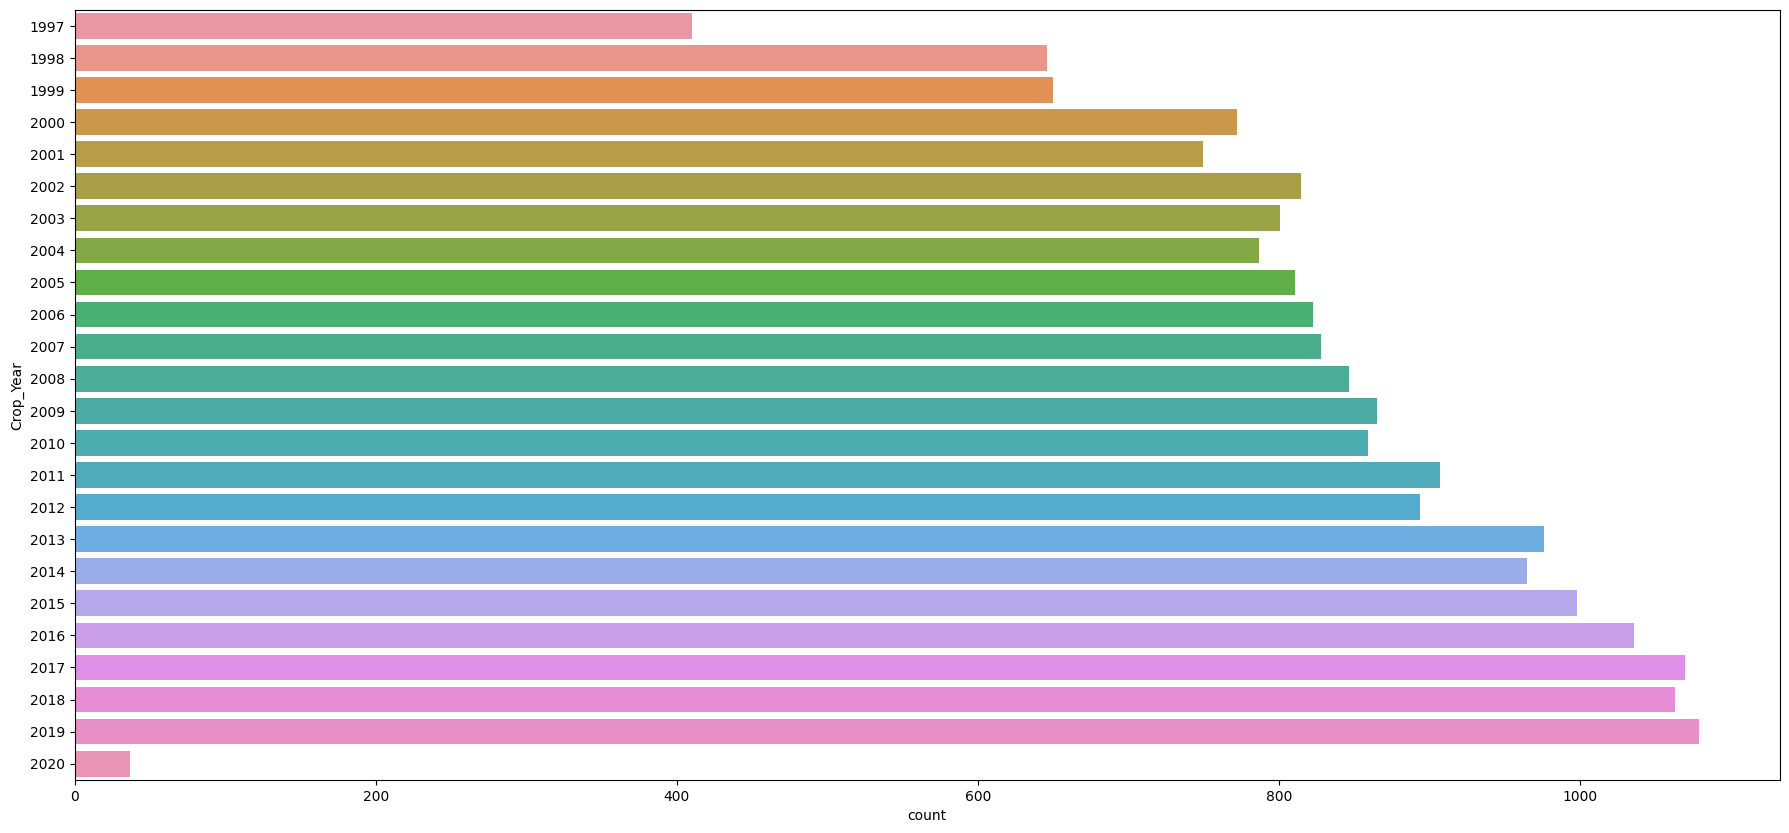

In [9]:
plt.figure(figsize=(22,10))
sns.countplot(y='Crop_Year',data=data)
plt.show()

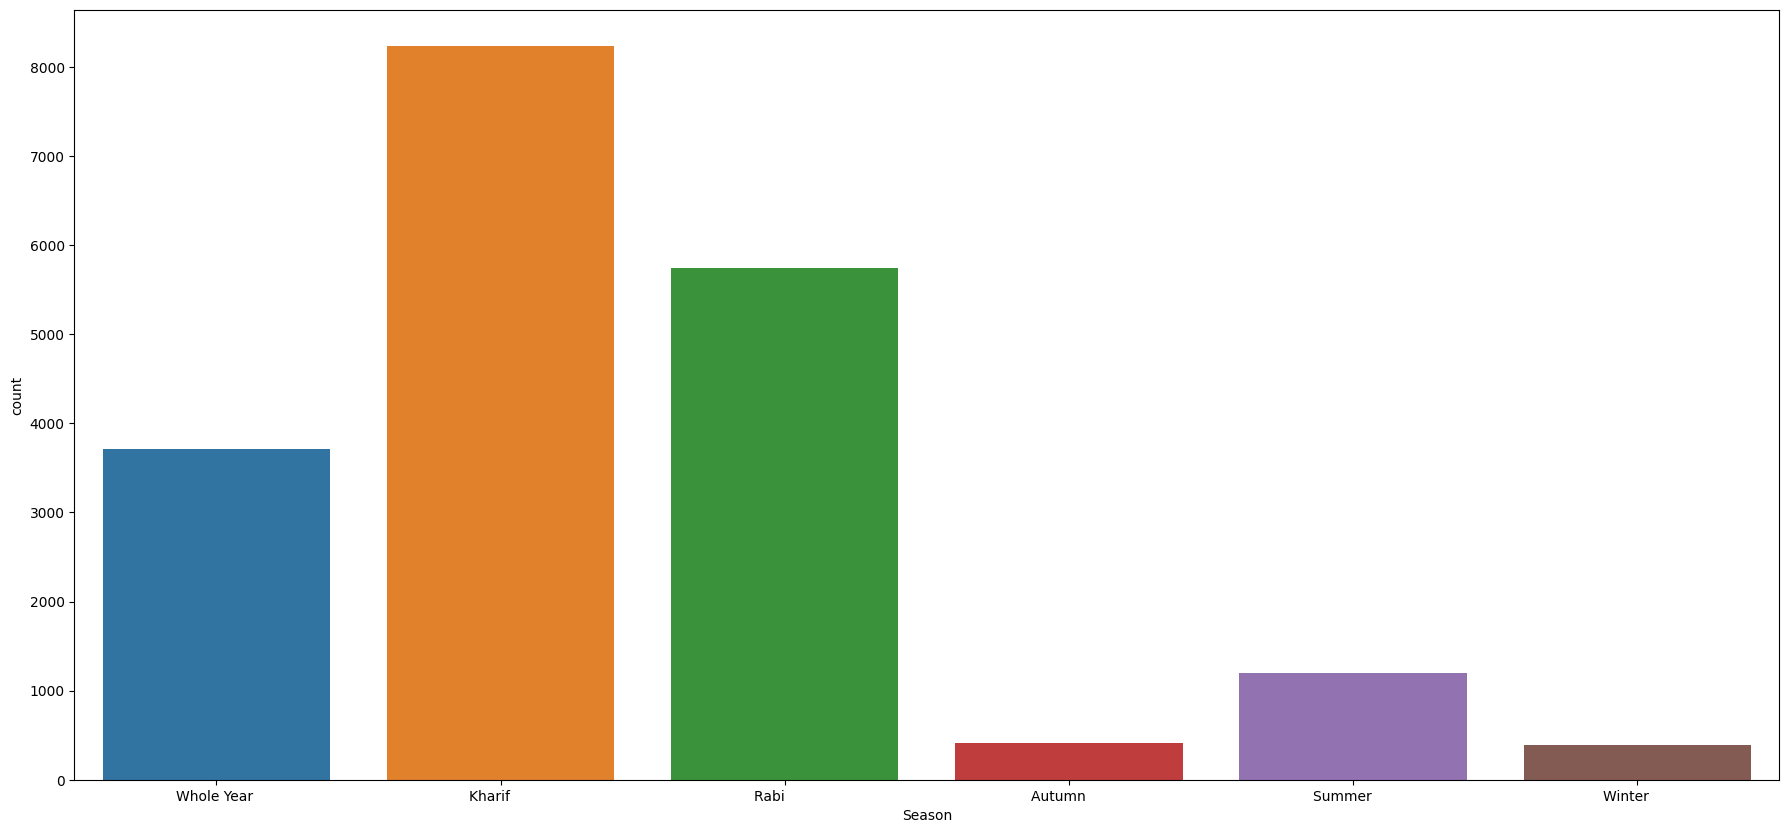

In [10]:
plt.figure(figsize=(22,10))
sns.countplot(x='Season',data=data)
plt.show()

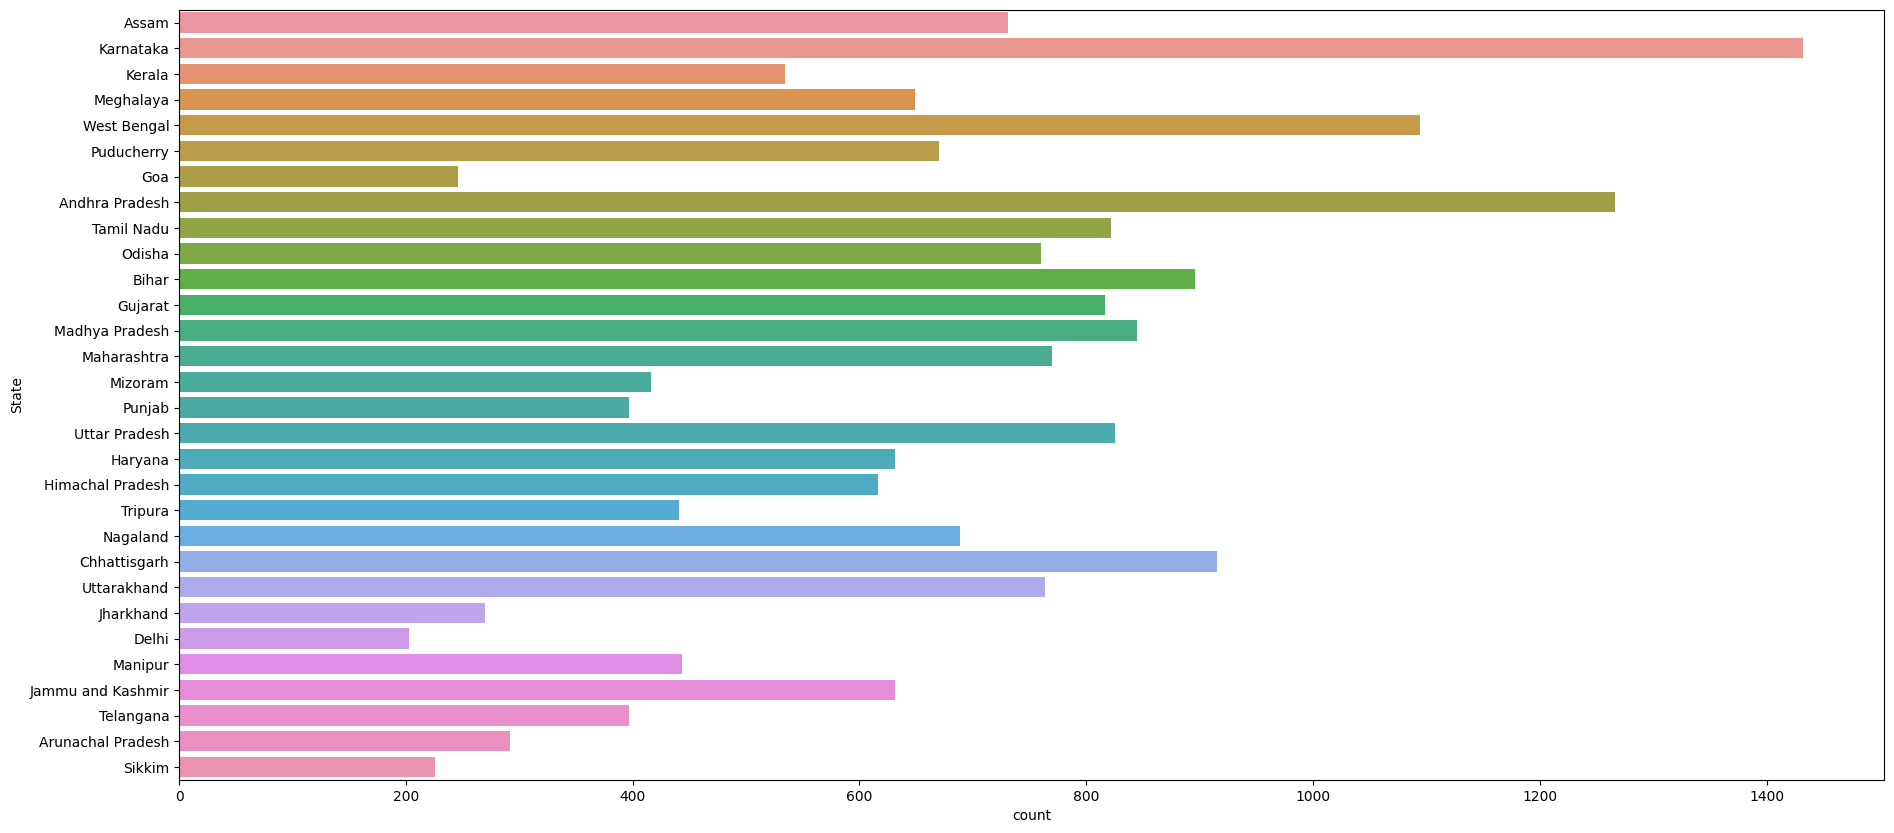

In [11]:
plt.figure(figsize=(22,10))
sns.countplot(y='State',data=data)
plt.show()

### Dataset sorted in ascending order of Crop Year

In [12]:
data = data.sort_values('Crop_Year', ascending=True)

In [13]:
data.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
17328,Other Rabi pulses,2020,Rabi,Uttarakhand,32.0,21,1313.947826,6195.52,11.84,0.763333
17329,Other Cereals,2020,Kharif,Uttarakhand,623.0,350,1313.947826,120619.03,230.51,0.558571
17330,Other Cereals,2020,Rabi,Uttarakhand,411.0,333,1313.947826,79573.71,152.07,0.808000
17323,Masoor,2020,Rabi,Uttarakhand,9246.0,6998,1313.947826,1790118.06,3421.02,0.751538
17350,other oilseeds,2020,Kharif,Uttarakhand,13.0,9,1313.947826,2516.93,4.81,0.700000


### Changing index to Crop Year

In [14]:
data=data.set_index('Crop_Year')

In [15]:
data.tail()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
2020,Other Rabi pulses,Rabi,Uttarakhand,32.0,21,1313.947826,6195.52,11.84,0.763333
2020,Other Cereals,Kharif,Uttarakhand,623.0,350,1313.947826,120619.03,230.51,0.558571
2020,Other Cereals,Rabi,Uttarakhand,411.0,333,1313.947826,79573.71,152.07,0.808000
2020,Masoor,Rabi,Uttarakhand,9246.0,6998,1313.947826,1790118.06,3421.02,0.751538
2020,other oilseeds,Kharif,Uttarakhand,13.0,9,1313.947826,2516.93,4.81,0.700000


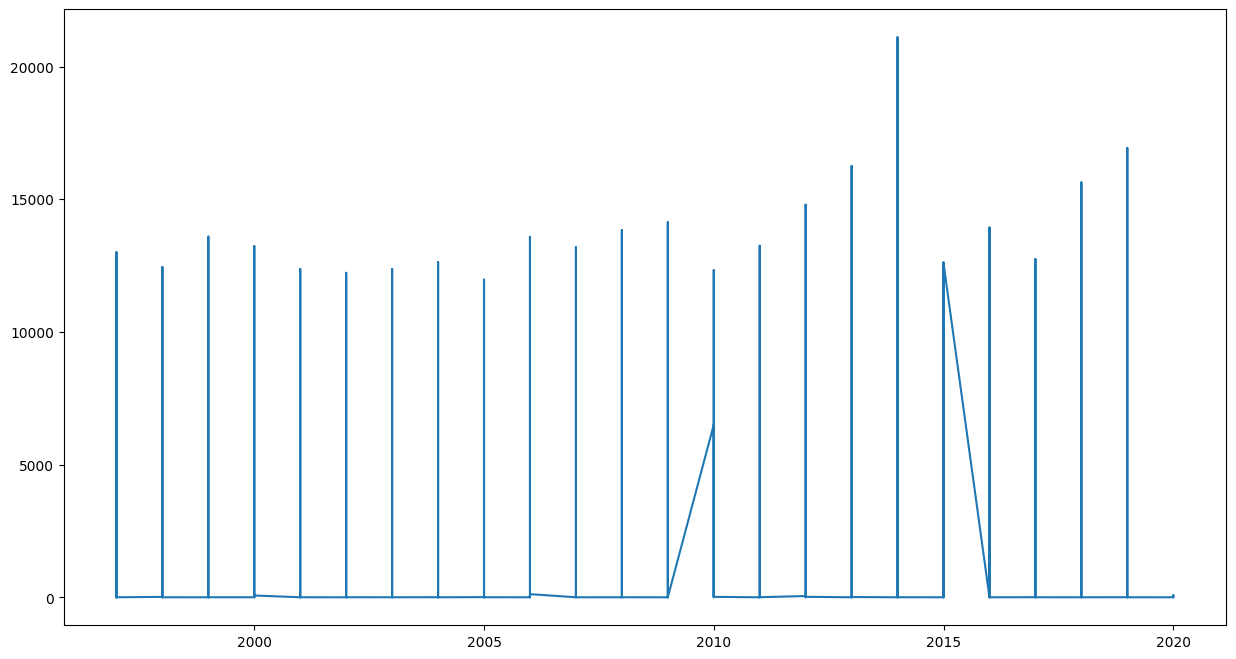

In [16]:
plt.figure(figsize=(15,8))
plt.plot(data['Yield'])
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [18]:
data.describe()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


### Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical = ['Crop', 'Season', 'State']
label = LabelEncoder()
for col in categorical:
    data[col] = label.fit_transform(data[col])

In [21]:
scalar = StandardScaler()

features = ['Crop', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

In [22]:
data[features] = scalar.fit_transform(data[features])
data

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,-1.886683,1.605437,-1.369833,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,0.796087
1997,-1.693887,1.605437,-0.814292,-0.219193,-0.058269,-0.782059,-0.234524,-0.200980,55.276000
1997,-1.758152,0.787429,-0.814292,-0.000173,-0.061036,-0.782059,-0.073641,0.032303,2.135000
1997,-1.758152,-0.848586,-0.814292,1.004180,-0.058245,-0.782059,0.664114,1.102061,1.218235
1997,-1.822418,-0.848586,-0.814292,0.294310,-0.061356,-0.782059,0.142674,0.345963,0.778421
...,...,...,...,...,...,...,...,...,...
2020,0.169811,-0.030578,1.518982,-0.245486,-0.062482,-0.151560,-0.253805,-0.228976,0.763333
2020,0.234077,-0.848586,1.518982,-0.244679,-0.062481,-0.151560,-0.252599,-0.227951,0.558571
2020,0.234077,-0.030578,1.518982,-0.244969,-0.062481,-0.151560,-0.253032,-0.228319,0.808000


In [23]:
data.describe()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04,19689.000000
mean,7.253750e-17,1.039343e-16,7.506368e-17,2.309652e-17,9.022078e-19,2.194169e-16,2.020945e-17,3.031418e-17,79.954009
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,878.306193
min,-1.886683e+00,-1.666594e+00,-1.592049e+00,-2.455289e-01,-6.248216e-02,-1.391199e+00,-2.538692e-01,-2.290314e-01,0.000000
25%,-7.941706e-01,-8.485858e-01,-8.142916e-01,-2.436328e-01,-6.247686e-02,-6.084735e-01,-2.518895e-01,-2.273594e-01,0.600000
50%,1.055456e-01,-3.057817e-02,-3.653384e-02,-2.328155e-01,-6.242968e-02,-2.327797e-01,-2.408625e-01,-2.176764e-01,1.030000
75%,8.767310e-01,7.874295e-01,8.523321e-01,-1.430310e-01,-6.201564e-02,2.521087e-01,-1.485036e-01,-1.350637e-01,2.388889
max,1.583651e+00,2.423445e+00,1.630090e+00,6.908772e+01,2.398616e+01,6.261494e+00,5.067539e+01,7.361928e+01,21105.000000


### Train/ Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
data.corr()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,1.000000,0.037492,0.038587,0.071105,-0.075893,0.033462,0.074676,0.066409,-0.110894
Season,0.037492,1.000000,-0.036625,-0.031369,0.096856,0.099357,-0.031800,-0.030598,0.141791
State,0.038587,-0.036625,1.000000,0.026989,0.003917,0.083953,0.026947,0.027629,0.009668
Area,0.071105,-0.031369,0.026989,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,-0.075893,0.096856,0.003917,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,0.033462,0.099357,0.083953,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.074676,-0.031800,0.026947,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,0.066409,-0.030598,0.027629,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,-0.110894,0.141791,0.009668,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


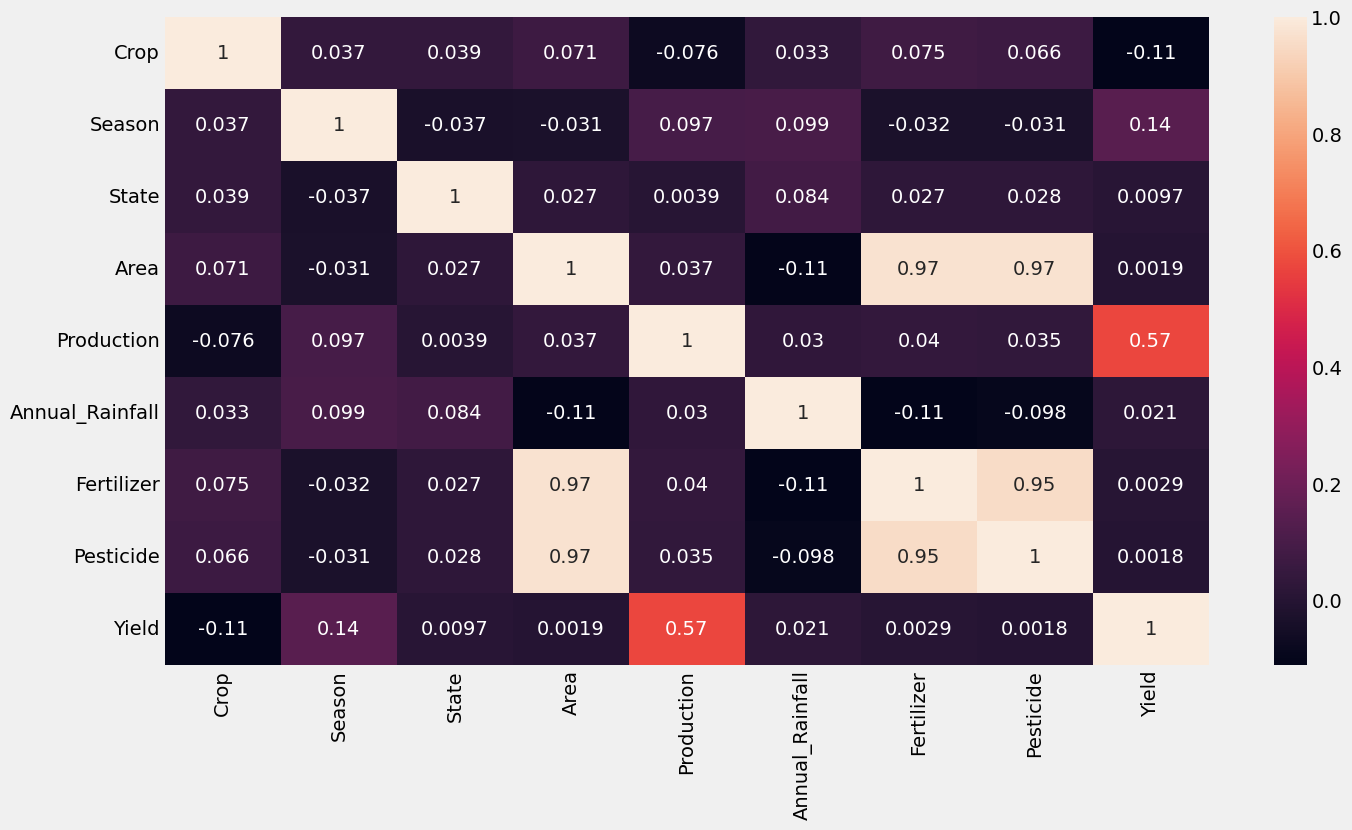

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [27]:
data = data.drop(['Area','Pesticide'], axis=1)
data.columns

Index(['Crop', 'Season', 'State', 'Production', 'Annual_Rainfall',
       'Fertilizer', 'Yield'],
      dtype='object')

In [28]:
X = data.drop('Yield',axis=1)
y = data['Yield']

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 20)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

### Evaluation

In [32]:
predictions = pd.DataFrame(y_test.copy())
predictions

,Yield
Crop_Year,
2015,51.838750
2017,0.771111
2016,72.571053
2015,0.443333
1999,3.409130
...,...
2006,2.363333
2012,2.078421
2006,0.495000


In [33]:
predictions['MultipleLR'] = model.predict(X_test)

In [34]:
predictions.head(20)

,Yield,MultipleLR
Crop_Year,,
2015,51.838750,139.768265
2017,0.771111,92.458987
2016,72.571053,152.192746
2015,0.443333,36.673737
1999,3.409130,78.658590
2009,0.564000,-126.780817
2014,0.350000,82.278446
2007,18.978571,274.300060
2010,0.455714,-87.505285


In [35]:
score = np.sqrt(mean_squared_error(predictions['Yield'], predictions['MultipleLR']))
print(f'RMSE Score on Test set: {score:0.2f}')
print("MSE score : ",mean_squared_error(predictions['Yield'], predictions['MultipleLR'])) 
mae = mean_absolute_error(predictions['Yield'], predictions['MultipleLR'])
print("MAE score : ",mean_absolute_error(predictions['Yield'], predictions['MultipleLR'])) 

RMSE Score on Test set: 656.73
MSE score :  431288.93867901695
MAE score :  135.13175761425347


In [36]:
r2 = r2_score(predictions['Yield'], predictions['MultipleLR'])

print(f'R2 Score on Test set: {r2:0.4f}')

R2 Score on Test set: 0.3049


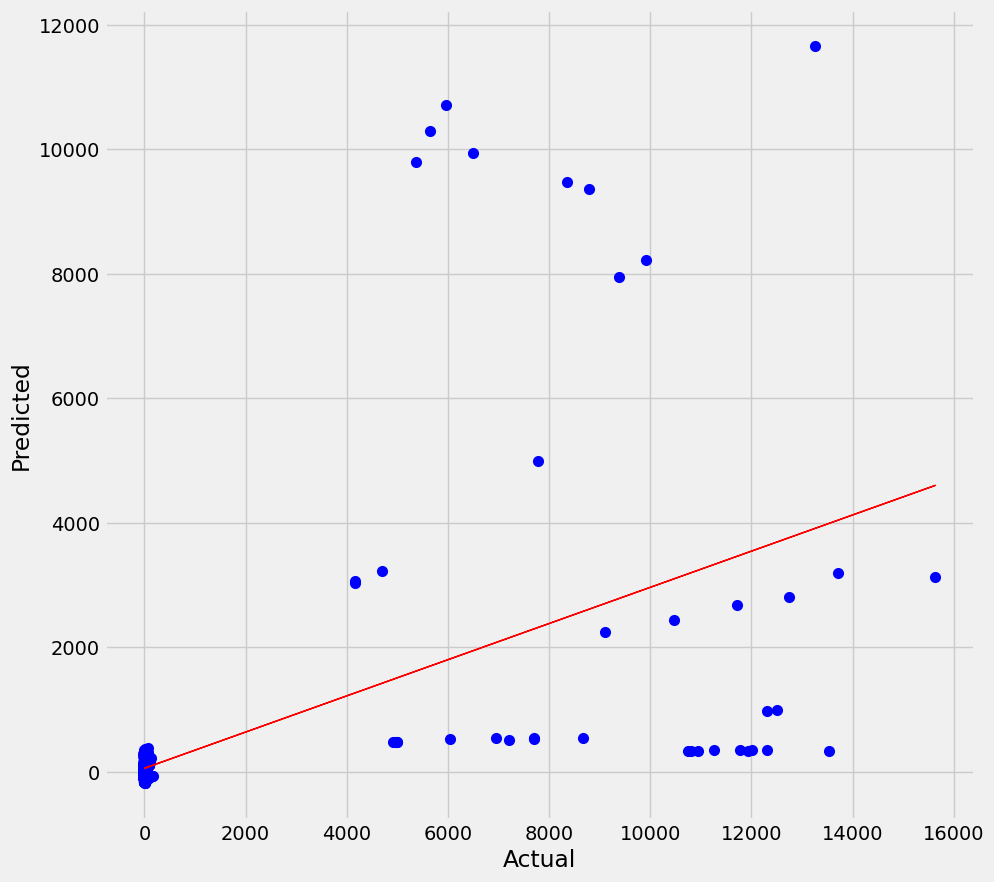

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(predictions['Yield'], predictions['MultipleLR'], color='blue', linewidth=2)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = predictions['Yield'].to_numpy().reshape(-1,1), predictions['MultipleLR'].to_numpy().reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test), color='red', linewidth=1)

plt.show()

### XGB Regressor

In [38]:
import xgboost as xgb
import pickle

In [39]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train,
        verbose=100)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation (XGB Regressor)

In [40]:
predictions['XGB_prediction'] = reg.predict(X_test)

In [41]:
predictions.head(40)

,Yield,MultipleLR,XGB_prediction
Crop_Year,,,
2015,51.838750,139.768265,49.294312
2017,0.771111,92.458987,0.779661
2016,72.571053,152.192746,96.177017
2015,0.443333,36.673737,0.998514
1999,3.409130,78.658590,2.322592
2009,0.564000,-126.780817,1.008992
2014,0.350000,82.278446,0.270730
2007,18.978571,274.300060,16.506887
2010,0.455714,-87.505285,0.373044


In [42]:
score = np.sqrt(mean_squared_error(predictions['Yield'], predictions['XGB_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')
print("MSE score : ",mean_squared_error(predictions['Yield'], predictions['XGB_prediction'])) 
mae = mean_absolute_error(predictions['Yield'], predictions['XGB_prediction'])
print("MAE score : ",mean_absolute_error(predictions['Yield'], predictions['XGB_prediction'])) 

RMSE Score on Test set: 105.44
MSE score :  11117.253862668374
MAE score :  7.061965933893464


In [43]:
r2 = r2_score(predictions['Yield'], predictions['XGB_prediction'])

print(f'R2 Score on Test set: {r2:0.4f}')

R2 Score on Test set: 0.9821


In [44]:
with open('xgb_regressor_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

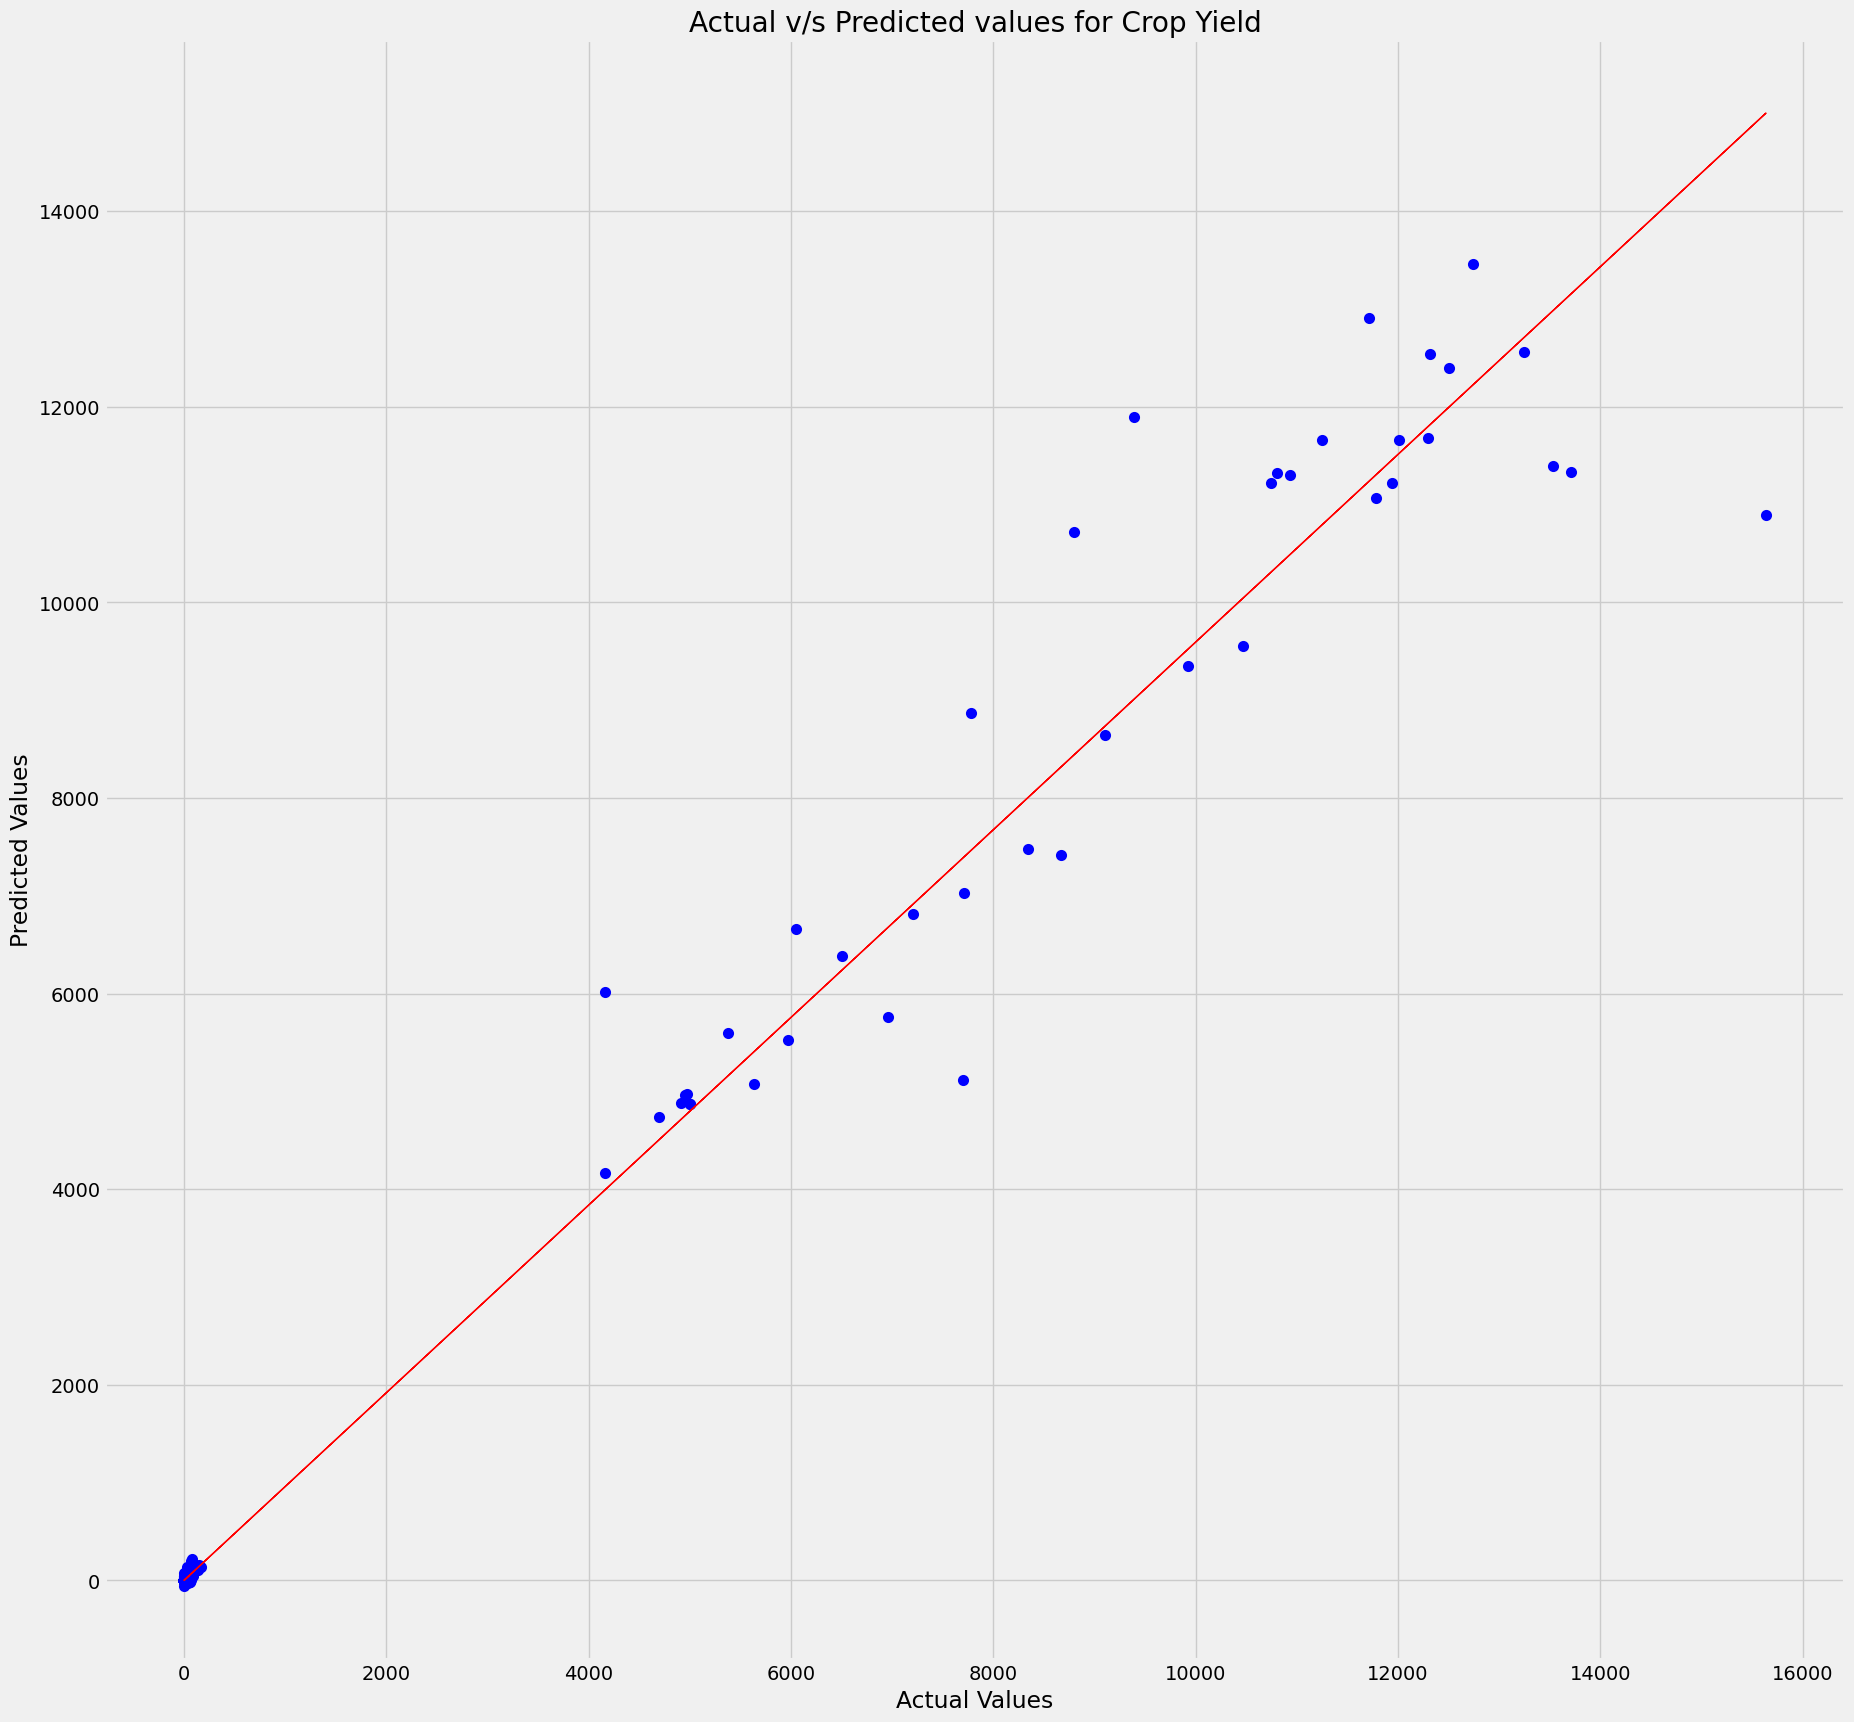

In [45]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(predictions['Yield'], predictions['XGB_prediction'], color='blue', linewidth=2)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
#regression line
y_test, y_predicted = predictions['Yield'].to_numpy().reshape(-1,1), predictions['XGB_prediction'].to_numpy().reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test), color='red', linewidth=1)
plt.title('Actual v/s Predicted values for Crop Yield')
plt.show()